In [ ]:
# Avg. distance between adjacent PASs (probably within 2kb) for polyA atlas

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [3]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [4]:
pls_file = od+expand(config['ccre']['bed_format'], species='human', ccre_type='pls')[0]
ca_h3_file = od+expand(config['ccre']['bed_format'], species='human', ccre_type='ca_h3k4me3')[0]
cage_file = od+expand(config['cage']['merged'], species='human')[0]
rampage_file = od+expand(config['rampage']['merged'], species='human')[0]
lrgasp_cage_file = od+expand(config['lrgasp_cage']['merged'], species='human')[0]
fantom_file = od+expand(config['fantom']['bed'], species='human')[0]

pas_atlas_file = od+expand(config['polya_atlas']['bed_formatted'], species='human')[0]
pas_file = od+expand(config['pas']['ends_formatted'], species='human', end_mode='tes')[0]

filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]

min_tpm = 1
gene_subset = 'polya'

## How close are pas atlas things and pas-seq to each other?

In [5]:
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

In [6]:
c_dict, order = get_sector_colors(cats=None)
c = c_dict['tes']

In [7]:
max_dist = 10000

1137216
568608


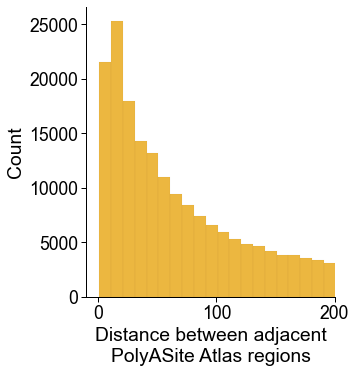

In [12]:
df = pr.read_bed(pas_atlas_file)
df2 = pr.read_bed(pas_atlas_file)

temp = df.k_nearest(df2, k=2,
                    ties=None,
                    strandedness='same',
                    overlap=True,
                    how=None,
                    suffix='_b')

# get the stuff that isn't the same
temp = temp.df
print(len(temp.index))
temp = temp.loc[temp.Name!=temp.Name_b]
print(len(temp.index))

# limit to things w/i a certain number of kb
temp['abs_dist'] = abs(temp.Distance)
temp = temp.loc[temp.abs_dist <= max_dist]
len(temp.index)

ax = sns.displot(temp, kind='hist', x='abs_dist', binwidth=10, color=c)
ax.set(xlim=(-10,200))
ax.set(xlabel='Distance between adjacent\nPolyASite Atlas regions')
fname = 'figures/dists_polya_atlast.pdf'
plt.savefig(fname, dpi=500)

161127
80676


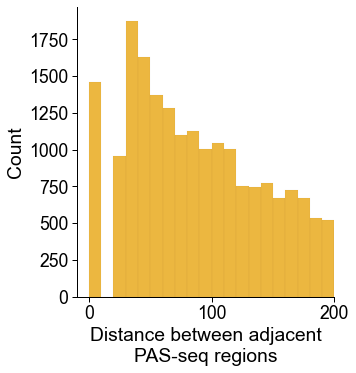

In [13]:
df = pr.read_bed(pas_file)
df2 = pr.read_bed(pas_file)

temp = df.k_nearest(df2, k=2,
                    ties=None,
                    strandedness='same',
                    overlap=True,
                    how=None,
                    suffix='_b')

# get the stuff that isn't the same
temp = temp.df
print(len(temp.index))
temp = temp.loc[temp.Name!=temp.Name_b]
print(len(temp.index))

# limit to things w/i a certain number of kb
temp['abs_dist'] = abs(temp.Distance)
temp = temp.loc[temp.abs_dist <= max_dist]
len(temp.index)

ax = sns.displot(temp, kind='hist', x='abs_dist', binwidth=10, color=c)
ax.set(xlim=(-10,200))
ax.set(xlabel='Distance between adjacent\nPAS-seq regions')
fname = 'figures/dists_pas_seq.pdf'
plt.savefig(fname, dpi=500)